Importing the dependencies

In [27]:
import pandas as pd
import numpy as np  
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns 

Importing the data

In [2]:
data = pd.read_csv('Datasets/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.drop(['CustomerID'], axis=1, inplace=True)

Encoding the data

In [8]:
label = LabelEncoder()  
data['Gender'] = label.fit_transform(data['Gender'])

In [9]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [13]:
features = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = data[features]


Scale the data

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Number of clusters using elbow method

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[800.0,
 597.9472937932278,
 494.8037500130457,
 395.39209034797966,
 351.74320617119116,
 277.3897401985191,
 251.15484911190174,
 211.98576294959307,
 185.72807688711418,
 152.02983429775685]

Plot the wcss

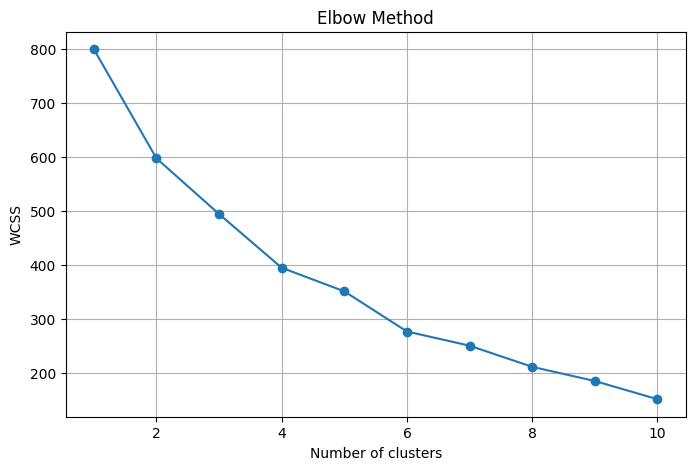

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

5 is the number of clusters that can be formed

In [21]:
k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)


In [24]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


Plotting the clusters 

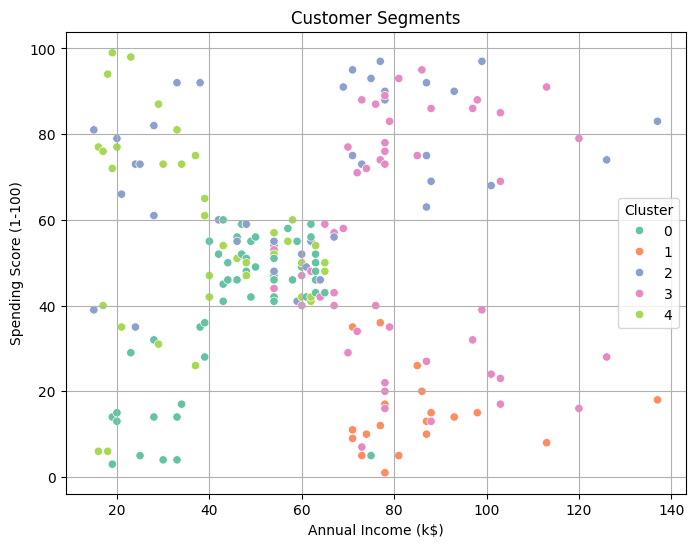

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=data, palette="Set2")
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

Saving the model as pkl

In [30]:
import pickle
with open('model/kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)    

with open('model/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)